In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
url= url = "https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/refs/heads/master/heart.csv"
df=pd.read_csv(url)
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df.isnull().sum().sum() #no null data

np.int64(0)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1),df['target'], test_size=0.2, random_state=42)

In [5]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [6]:
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [7]:
model.predict_proba(X_test)[:,0]

array([0.9220376 , 0.2606739 , 0.14476329, 0.9715644 , 0.06052623,
       0.0875584 , 0.41062156, 0.99824472, 0.99494807, 0.5294538 ,
       0.25101766, 0.9240554 , 0.08788413, 0.97274321, 0.01404759,
       0.05491358, 0.01654815, 0.93551616, 0.99325584, 0.9878603 ,
       0.29560417, 0.98972886, 0.87229449, 0.19089429, 0.07168187,
       0.30843685, 0.12310818, 0.37379873, 0.99232376, 0.07956549,
       0.96259227, 0.96560145, 0.99381129, 0.91958842, 0.28598626,
       0.92662792, 0.33515643, 0.11868743, 0.17447956, 0.15988663,
       0.47396025, 0.19757201, 0.18588062, 0.31018661, 0.15133229,
       0.99365603, 0.24633798, 0.04380492, 0.91314003, 0.97396117,
       0.92899536, 0.9890636 , 0.16158655, 0.0214665 , 0.77540449,
       0.99858375, 0.95166354, 0.03936693, 0.98274136, 0.99577051,
       0.96464116])

In [9]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8689


In [10]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.8512
Test set score: 0.8689


In [11]:
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[25  4]
 [ 4 28]]

True Positives(TP) =  25

True Negatives(TN) =  28

False Positives(FP) =  4

False Negatives(FN) =  4


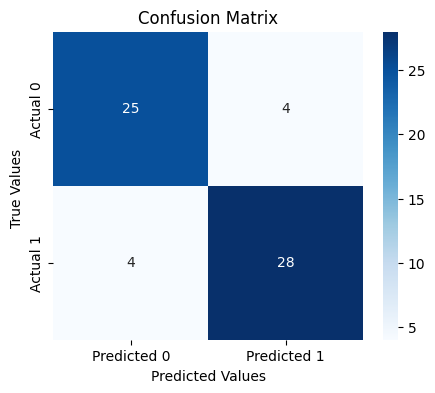

Confusion Matrix:
 [[25  4]
 [ 4 28]]


In [12]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',xticklabels=['Predicted 0', 'Predicted 1'],yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Values')
plt.ylabel('True Values ')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:\n", cm)

In [13]:
prec_score=precision_score(y_test,y_pred_test)
print("Precision Score:",prec_score)

Precision Score: 0.875


In [14]:
recall_score=recall_score(y_test,y_pred_test)
print("Recall Score:",recall_score)

Recall Score: 0.875


In [15]:
f1_score=f1_score(y_test,y_pred_test)
print("F1 Score:",f1_score)

F1 Score: 0.875
